Model Performance:
Mean Absolute Error (MAE): ₹243,756.48
Mean Squared Error (MSE): ₹78,440,549,944.81
Root Mean Squared Error (RMSE): ₹280,072.40
R² Score: -0.0082

Predicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: ₹541,534.12 INR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


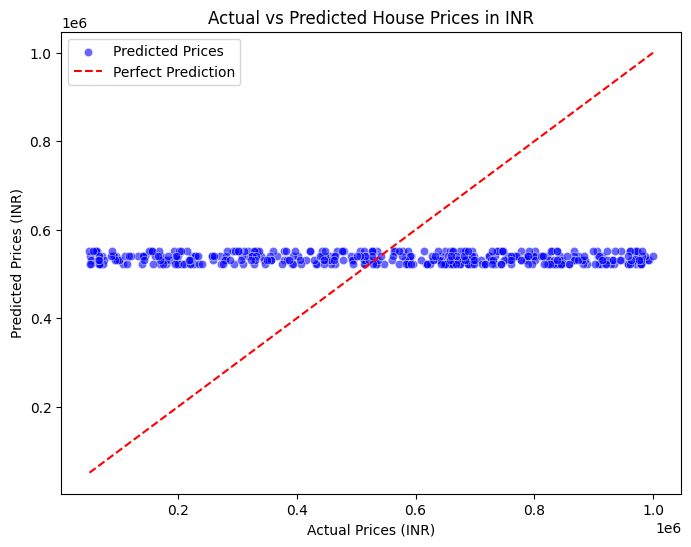

In [ ]:
# Task-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/content/House Price Prediction Dataset.csv"
df = pd.read_csv(file_path)
df_cleaned = df[['Area', 'Bedrooms', 'Bathrooms', 'Price']].dropna()
X = df_cleaned[['Area', 'Bedrooms', 'Bathrooms']]
y = df_cleaned['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

def predict_house_price(area, bedrooms, bathrooms):
    input_data = np.array([[area, bedrooms, bathrooms]])
    predicted_price = model.predict(input_data)[0]
    return round(predicted_price, 2)

example_price = predict_house_price(2000, 3, 2)
print(f"\nPredicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: ₹{example_price:,.2f} INR")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label="Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Prices (INR)")
plt.ylabel("Predicted Prices (INR)")
plt.title("Actual vs Predicted House Prices in INR")
plt.legend()
plt.show()
